In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic weather temperature data

In [2]:
def generate_weather_data(size=500):
    x = np.linspace(0, 50, size)
    temp = 15 + 5 * np.sin(0.2 * x) + np.random.normal(scale=1.5, size=size)
    return temp.astype(np.float32)
 
series = generate_weather_data()
series = (series - np.mean(series)) / np.std(series)  # Normalize

# Create sequences

In [3]:
def create_dataset(series, window=24):
    X, y = [], []
    for i in range(len(series) - window):
        X.append(series[i:i+window])
        y.append(series[i+window])
    return np.array(X)[..., np.newaxis], np.array(y)
 
X, y = create_dataset(series)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Define three different models

In [4]:
def build_lstm_model():
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(32, input_shape=(24, 1)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model
 
def build_gru_model():
    model = tf.keras.Sequential([
        tf.keras.layers.GRU(32, input_shape=(24, 1)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model
 
def build_dense_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(24, 1)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Train individual models

In [5]:
lstm_model = build_lstm_model()
gru_model = build_gru_model()
dense_model = build_dense_model()
 
lstm_model.fit(X_train, y_train, epochs=5, verbose=0)
gru_model.fit(X_train, y_train, epochs=5, verbose=0)
dense_model.fit(X_train, y_train, epochs=5, verbose=0)

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Ensemble prediction (average)

In [6]:
lstm_pred = lstm_model.predict(X_test[:100]).flatten()
gru_pred = gru_model.predict(X_test[:100]).flatten()
dense_pred = dense_model.predict(X_test[:100]).flatten()
 
ensemble_pred = (lstm_pred + gru_pred + dense_pred) / 3
true = y_test[:100]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


# Plot results

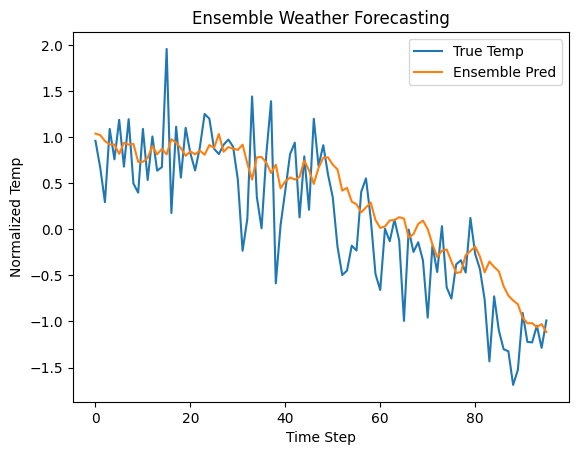

In [7]:
plt.plot(true, label='True Temp')
plt.plot(ensemble_pred, label='Ensemble Pred')
plt.title("Ensemble Weather Forecasting")
plt.xlabel("Time Step")
plt.ylabel("Normalized Temp")
plt.legend()
plt.show()